In [26]:
import numpy as np
import metrics as metrics
import Diffusion as df
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotting as plotting
from sklearn.utils import shuffle
from collections import namedtuple
np.random.seed(123)

# Gaussian mixture

In the following experiment we focus on a simple classification test using a mixture of Gaussians. We generate two classes using two Gaussians, based on the following steps:
1. Draw the centeres of the generated classes $\boldsymbol{\mu}_1, \boldsymbol{\mu}_1 \sim \mathcal{N}(\boldsymbol{0}, \sigma_M \boldsymbol{I}_{6 \times 6})$. 
2. Draw $N=100$ samples from each classes $C_1, C_2$ from $\mathcal{N}(\boldsymbol{\mu}_i, \sigma_V \boldsymbol{I}_{6 \times 6})$

In [14]:
sigma_m = 2
sigma_v = 1.5
N = 100
num_classes = 2
dimension = 6
centers = [np.random.normal(np.zeros(dimension), sigma_m**2, size=dimension) for i in range(num_classes)]
classes = np.array([[np.random.normal(center, sigma_v**2) for i in range(N)] for center in centers])
x_train = np.concatenate((classes[0], classes[1]))
y_train = np.concatenate((np.ones(N, dtype="int"), np.zeros(N, dtype="int")))
x_train, y_train = shuffle(x_train, y_train, random_state=0) 

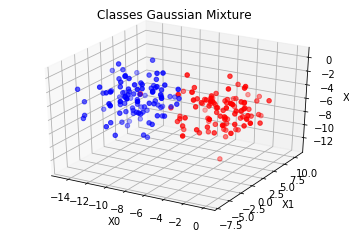

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(classes[0, :, 0], classes[0, :, 1], classes[0, :, 3], color = "red", label="Class 1")
ax.scatter(classes[1, :, 0], classes[1, :, 1], classes[1, :, 3], color = "blue", label="Class 1")
ax.set_title("Classes Gaussian Mixture")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X2")
plt.show()

Now let's perform the diffusion map for a range of scales $\sigma$ and plot the metrics. 

In [16]:
sigmas = np.linspace(0.1, 100, 100)
met = {"geometric": [], "spectral": [], "probabilistic": []}
for sigma in sigmas:
    embed, _, eig = df.diffusion_map(x_train, k=10, dim=2, sigma=sigma)
    met["geometric"].append(metrics.geometric(embed, y_train))
    met["spectral"].append(metrics.spectral(x_train, y_train, sigma=sigma, k=9))
    met["probabilistic"].append(metrics.probabilistic(eig, y_train))

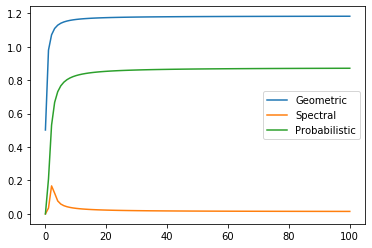

In [17]:
fig, ax = plt.subplots()
ax.plot(sigmas, met["geometric"], label="Geometric")
ax.plot(sigmas, met["spectral"], label="Spectral")
ax.plot(sigmas, met["probabilistic"], label="Probabilistic")
ax.legend()
plt.show()

Now let's test with some of the other scale parameters schemes. 

In [29]:
embed_ada, _, eig_ada = df.diffusion_map(x_train, k=10, dim=2, sigma="adaptive")
met_ada = {}
met_ada["geometric"] = metrics.geometric(embed_ada, y_train)
met_ada["spectral"] = metrics.spectral(x_train, y_train, sigma="adaptive", k=9, ref_neighbor=3)
met_ada["probabilistic"] = metrics.probabilistic(eig_ada, y_train)
print(met_ada)

{'geometric': 1.137959902065448,
 'spectral': 0.041571426051288496,
 'probabilistic': 0.7552868635452193}

In [31]:
embed_median, _, eig_median = df.diffusion_map(x_train, k=10, dim=2, sigma=0)
met_median = {}
met_median["geometric"] = metrics.geometric(embed_median, y_train)
met_median["spectral"] = metrics.spectral(x_train, y_train, sigma=0, k=9, ref_neighbor=3)
met_median["probabilistic"] = metrics.probabilistic(eig_median, y_train)
print(met_median)

{'geometric': 1.130328534331361, 'spectral': 0.011315349164871202, 'probabilistic': 0.7441419907286977}


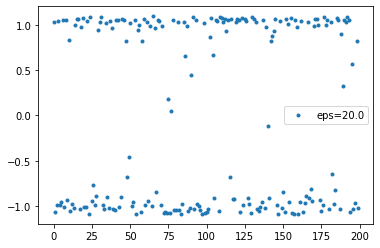

In [18]:
sigmas =[20.]
for sigma in sigmas:
    embed, _, eig = df.diffusion_map(x_train, k=10, dim=2, sigma=sigma)
    order = np.argsort(eig["vals"])[::-1]
    vals = eig["vals"][order]
    vecs = eig["vecs"][:, order]
    vecs = vecs/vecs[0,0]
    coords = vecs @ np.diag(vals)
    plt.plot(np.arange(N * num_classes), coords[:,1], ".",  label=f"eps={sigma}")
plt.legend()
plt.show()

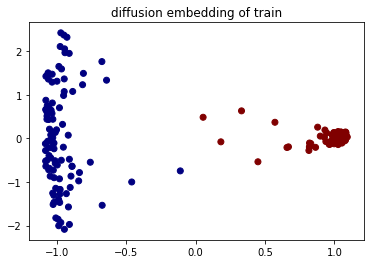

In [19]:
embed, _, eig = df.diffusion_map(x_train, k=10, dim=2, sigma=20)
plotting.plot_embedding_space(embed, y_train)